# Create all charts
---

## The data sets we used are:
* City of Austin, austin_311_service_requests.csv
* The Travis county zip codes from the US Census Bureau.
* Social/Economic census data for Austin, TX by zipcode from the US Census Bureau
* City of Austin Household statistics from the US Census Bureau.

In [1]:
import os
import datetime
import numpy as np
import regex as reg
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
path_311 = os.path.join('..', 'data', '311_cleaned_data_.csv')
df = pd.read_csv(path_311)
df.count()

service_request_id      275281
status_description      275281
mobile_web_status       275281
duplicate_verified      275281
override_duplicate      275281
functional_location     249932
source                  275280
closed_date             125670
updated_datetime        158982
open                    275281
closed                  275281
description             273914
agency_responsible      274720
service_name            274244
service_subtype          72326
lat                     275281
long                    275281
sap_problem_category    156983
sap_problem_type        156964
address                 274431
case_record_type        275281
district                274405
date                    275281
time                    275281
weekday                 275281
year                    275281
month                   275281
day                     275281
dtype: int64

### Number of 311 calls by month

* calls from 2016-05-20 to 2018-05-19

In [3]:
print('min:', df['date'].min())
print('max:', df['date'].max())

min: 2016-05-20
max: 2018-07-29


In [4]:
period_311 = df[df['date'] < '2018-07-20']
months = period_311.groupby('month', as_index=False)['service_request_id'].count()
months['month'] = months['month'].map(lambda x: datetime.date(1900, int(x), 1).strftime('%B'))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

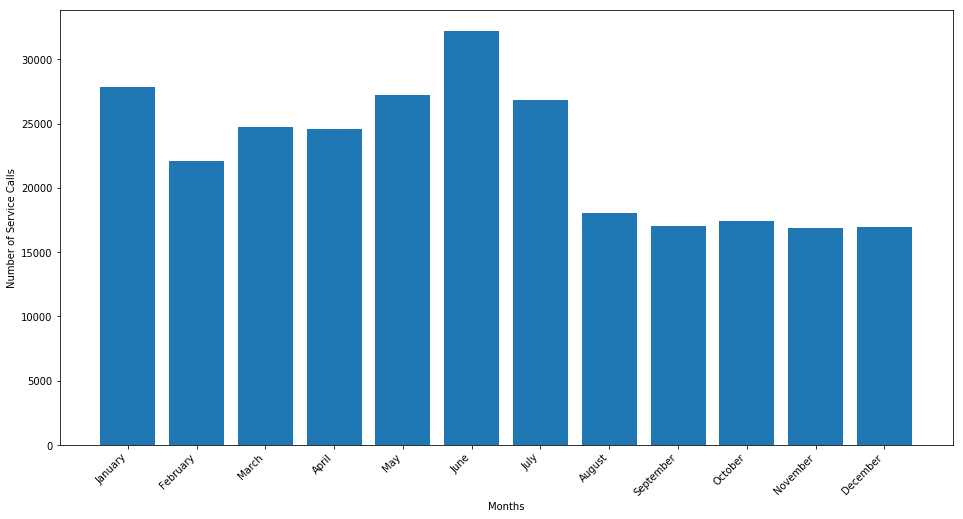

In [30]:
plt.figure(figsize=[16, 8])
plt.bar(months['month'], months['service_request_id'])
plt.xlabel('Months')
plt.ylabel('Number of Service Calls')
plt.xticks(rotation=45, ha='right')

### Number of 311 calls by type

* Garrett is working on this

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

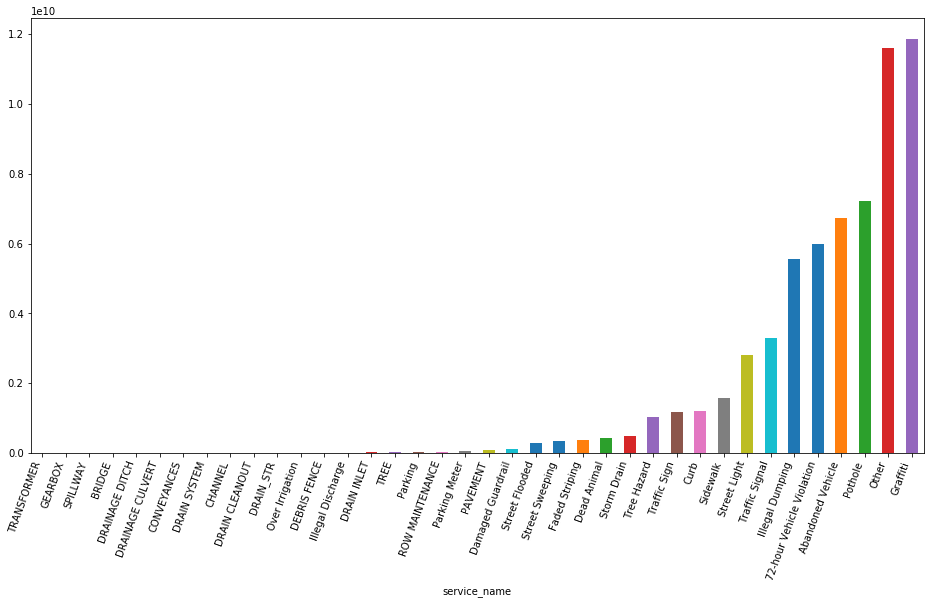

In [6]:
service_df = df.groupby('service_name')
service = service_df['service_request_id'].sum().sort_values()
fig, ax = plt.subplots(figsize=[16, 8])
service.plot.bar()
plt.xticks(rotation=70, ha='right')

### breakdown of percentage of call categories

In [7]:
x, = reg.findall('CA.*(\d{5})', '20121 Frankfort St, San Diego, CA 92110, USA')
x

'92110'

In [9]:
regzip = df[type(df['address'] == str, 'address')].map(lambda x: type(x))
regzip.unique()

TypeError: type() takes 1 or 3 arguments

In [10]:
df['case_record_type'].unique()

array(['Parking', 'ESD Complaint/Report', 'Street Division', 'TSW ROW',
       'Street Division Closed Case', 'Storm Water',
       'Traffic Engineering', 'Storm Water Code Enforcement',
       'Storm Water Closed Case', 'HAZMAT', '72 Hour Report',
       'Traffic Engineering Closed Case', 'AVA'], dtype=object)

### locations of callers (bubble plot?)

### Number of calls per capita by zipcode

In [11]:
pop_path = os.path.join('..', 'data', 'census_population_by_zip.csv')
pop_df = pd.read_csv(pop_path)
pop_df.head()

,zip_code,total population
0,91901,18586
1,91902,19429
2,91905,1539
3,91906,3565
4,91910,76027


### Number of calls by median household income of zip

In [13]:
income_path = os.path.join('..', 'data', 'census_income_by_zip.csv')
income_df = pd.read_csv(income_path)
income_df.head()

,zip_code,Mean income,MoE Mean income,Median income,MoE Median income
0,91911,62932,2137,51383,1874
1,91914,137640,8680,124578,7047
2,91915,111918,8589,104170,6753
3,91932,59870,2942,48010,1975
4,91942,70677,3837,55753,3194


### Number of calls by crime rate of zip

### Percent of call types by median household income (stacked bar)

### Number of calls by Temperature scatter

In [14]:
owm_path = os.path.join('..', 'data', 'owm_2016_2018.csv')
temp_df = pd.read_csv(owm_path)
temp_df.head()

,dt_iso,temp_f,pressure,humidity,weather_main
0,2016-05-01 07:00:00 +0000 UTC,54.37,1012,72,Clouds
1,2016-05-01 08:00:00 +0000 UTC,53.69,1012,72,Haze
2,2016-05-01 09:00:00 +0000 UTC,52.63,1012,72,Haze
3,2016-05-01 09:00:00 +0000 UTC,52.63,1012,72,Mist
4,2016-05-01 10:00:00 +0000 UTC,51.84,1011,77,Mist


In [15]:
[x for x in temp_df['dt_iso'].head()]

['2016-05-01 07:00:00 +0000 UTC',
 '2016-05-01 08:00:00 +0000 UTC',
 '2016-05-01 09:00:00 +0000 UTC',
 '2016-05-01 09:00:00 +0000 UTC',
 '2016-05-01 10:00:00 +0000 UTC']

### Number fo calls by weekday

In [16]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', ]
weekdays = df.groupby('weekday', as_index=False)['service_request_id'].count()
weekdays['day_order'] = weekdays['weekday'].map(lambda x: days.index(x))
weekdays.sort_values('day_order', inplace=True)
weekdays

,weekday,service_request_id,day_order
1,Monday,45148,0
5,Tuesday,47993,1
6,Wednesday,46736,2
4,Thursday,43942,3
0,Friday,39692,4
2,Saturday,25782,5
3,Sunday,25988,6


<BarContainer object of 7 artists>

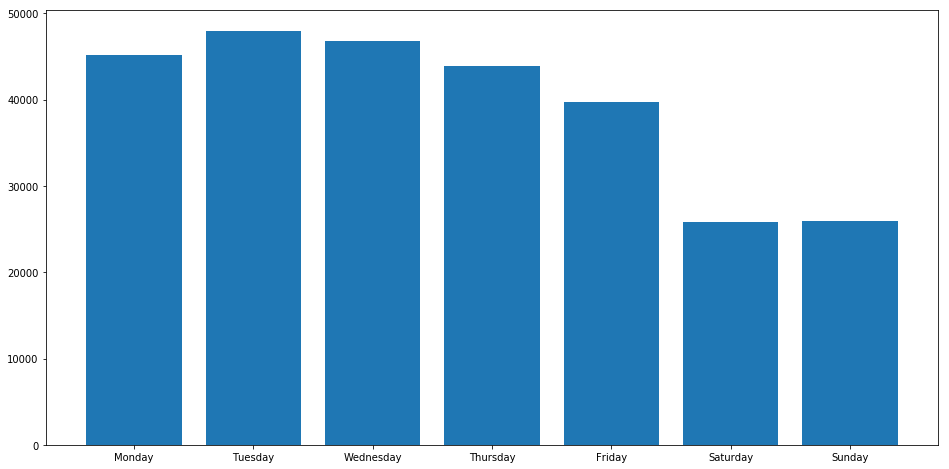

In [17]:
plt.figure(figsize=[16, 8])
plt.bar(weekdays['weekday'], weekdays['service_request_id'])